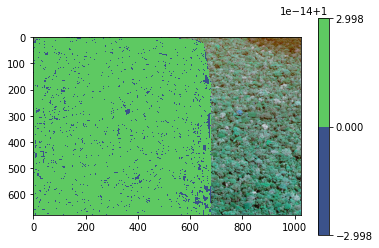

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


# Load the image and convert to grayscale
img = cv2.imread('/content/amazon_forest.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to the grayscale image
edges = cv2.Canny(gray, 150, 200)

# Apply the Hough transform to extract lines from the edge image
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=5)

# Create an empty image for the contour map
contour_map = np.zeros_like(gray)

# Draw each line on the contour map
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(contour_map, (x1, y1), (x2, y2), 255, 1)

# Interpolate the lines to create a contour map
x, y = np.nonzero(contour_map)
z = np.ones_like(x)
grid_x, grid_y = np.mgrid[0:gray.shape[0], 0:gray.shape[1]]
contour_lines = plt.contourf(grid_x, grid_y, griddata((x, y), z, (grid_x, grid_y), method='cubic'))

# Display the contour map
plt.imshow(img)
plt.colorbar(contour_lines)
plt.show()


# next trial

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread('/content/amazon_forest.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)


Define the threshold value for the contour line.

In [ ]:
threshold = 150

Create a binary image by thresholding the grayscale image.

In [ ]:
ret, binary_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)


Find the contour line using the findContours function.

In [ ]:
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


Create a blank image to draw the contour line.

In [ ]:
contour_img = np.zeros_like(img)
# plt.imshow(contour_img)

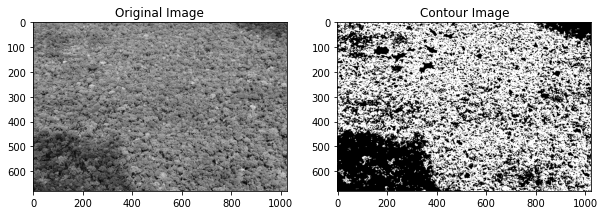

In [ ]:
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(contour_img, cmap='gray')
ax[1].set_title('Contour Image')
plt.show()


#Next trial using equalizehist

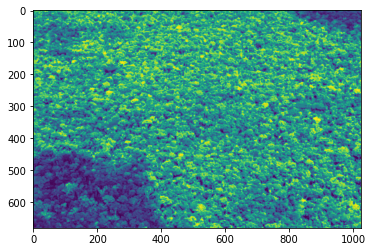

In [ ]:
img = cv2.imread('/content/amazon_forest.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img_eq = cv2.equalizeHist(img)
img_blur = cv2.GaussianBlur(img_eq, (5, 5), 0)
plt.imshow(img_blur)

Detect edges in the image using the cv2.Canny() function.

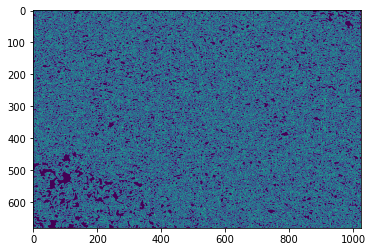

In [ ]:
edges = cv2.Canny(img_blur, 0, 150)
plt.imshow(edges)

Find the contour lines using the cv2.findContours() function.

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


Plot the contour lines on the original image using the plt.contour() function.

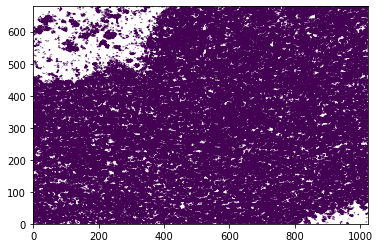

In [ ]:
# plt.contour(img, levels=[128], colors='red')
plt.contour(img, levels=[128])
plt.show()


### Count the coutour 

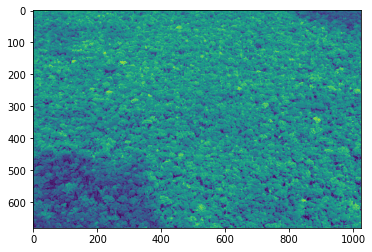

In [ ]:
# Convert the image to grayscale
img = cv2.imread('/content/amazon_forest.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [ ]:
# Threshold the image to create a binary image
ret, thresh = cv2.threshold(gray, 100, 255, 0)
# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
# Count the number of closed contours
num_closed_contours = 0
for contour in contours:
    # Check if the contour is closed
    if cv2.isContourConvex(contour):
        num_closed_contours += 1

# Print the number of closed contours
print("Number of closed contours:", num_closed_contours)

Number of closed contours: 123


## This may work to count no of trees 

In [ ]:
import cv2

img = cv2.imread('/content/amazon_forest.jpg')
img.shape

(680, 1024, 3)

Preprocess the image to enhance the contrast and reduce noise. You can use the cv2.equalizeHist() function to enhance the contrast, and the cv2.GaussianBlur() function to reduce noise.

In [ ]:
# Example preprocessing steps
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_eq = cv2.equalizeHist(gray)
gray_blur = cv2.GaussianBlur(gray_eq, (5, 5), 0)



In [ ]:
ret, thresh = cv2.threshold(gray_blur, 50, 255, cv2.THRESH_BINARY)



Apply morphological operations to clean up the segmented image and remove noise

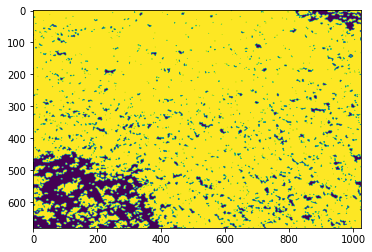

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(morph)

Identify the individual trees in the segmented image using object detection algorithms

In [ ]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 1
params.filterByCircularity = True
params.minCircularity = 0.7
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(morph)
num_trees = len(keypoints)
print(f'total no of trees in image are {num_trees}')


total no of trees in image are 779


Next approach

In [ ]:
import cv2

# Load the aerial image
img = cv2.imread('/content/amazon_forest.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, 0)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
trees = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10 and area < 50000:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) > 4 and len(approx) < 20:
            trees.append(contour)
print(len(trees))

3373


In [ ]:
rects = []
for contour in trees:
    x, y, w, h = cv2.boundingRect(contour)
    rects.append((x, y, x + w, y + h))

grouped_rects, weights = cv2.groupRectangles(rects, 1, 0.2)
num_trees = len(grouped_rects)
print(num_trees)

18


### Counting the trees and vegetation  index from drone image

In [ ]:
import cv2
import numpy as np
from skimage import measure
from skimage.color import rgb2gray


In [ ]:
img = cv2.imread('/content/amazon_forest.jpg')


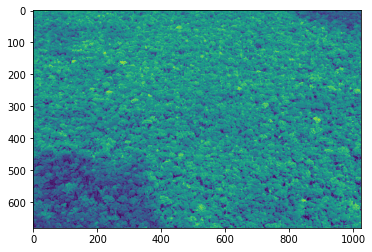

In [ ]:
# convert grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [ ]:
# Apply a threshold to the grayscale image to segment the vegetation
_, thresh = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)

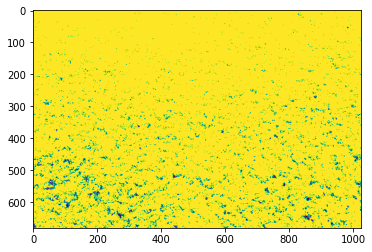

In [ ]:
# Convert the segmented image to binary format
thresh = thresh.astype(np.uint8)
plt.imshow(thresh)

In [ ]:
# Find contours in the binary image to identify the connected regions of vegetation
contours = measure.find_contours(thresh, 0.8)
num_trees = len(contours)
num_trees

3565

<ipython-input-222-2dec66caff89>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (red - blue) / (red + blue)


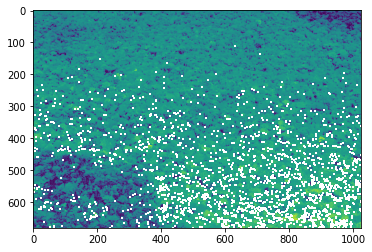

In [ ]:
# Calculate the vegetation index
red = img[:,:,2].astype(float)
green = img[:,:,1].astype(float)
blue = img[:,:,0].astype(float)

ndvi = (red - blue) / (red + blue)
plt.imshow(ndvi)

In [ ]:
import cv2
import numpy as np

# Load the drone image
img = cv2.imread('/content/amazon_forest.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to the grayscale image to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the blurred image to separate the foreground (trees) from the background
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of contours (which correspond to trees) in the image
num_trees = len(contours)

# Calculate the vegetation index
green = img[:,:,1]
red = img[:,:,2]
ndvi = (green - red) / (green + red)

# Display the results
print("Number of trees: ", num_trees)
print("Normalized Difference Vegetation Index (NDVI): ", round(ndvi[ndvi<1e30].mean(),3))


Number of trees:  280
Normalized Difference Vegetation Index (NDVI):  0.839


<ipython-input-238-5fd988aaad5e>:25: RuntimeWarning: divide by zero encountered in true_divide
  ndvi = (green - red) / (green + red)
<ipython-input-238-5fd988aaad5e>:25: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (green - red) / (green + red)


In [ ]:
ndvi[ndvi<1e30].mean()

### Examine the canopy cover 

In [ ]:
import cv2
import numpy as np

# Load the aerial image
img = cv2.imread('/content/a.jpg')

# Split the image into its red, green, and blue channels
b, g, r = cv2.split(img)


In [ ]:
# Calculate the NDVI from the red and near-infrared (NIR) channels of the image using the following formula
ndvi = (r.astype(float) - b.astype(float)) / (r.astype(float) + b.astype(float))


In [ ]:
# Threshold the NDVI image to obtain a binary image that separates vegetation from non-vegetation
# Apply a threshold to the NDVI image to obtain a binary mask
thresh =3.92156863e-03 #0.2
mask = cv2.threshold(ndvi, thresh, 1, cv2.THRESH_BINARY)[1]


In [ ]:
# Calculate the percentage of the image covered by vegetation
percent_cover = (np.sum(mask) / (img.shape[0] * img.shape[1])) * 100
print("Canopy cover: {:.2f}%".format(percent_cover))

Canopy cover: 60.91%


In [ ]:
# Calculate the biomass estimate based on NDVI
biomass = np.sum(ndvi >thresh)

# Print the biomass estimate
print("Biomass estimate in image covered area : ", biomass) 

Biomass estimate:  202079


In [ ]:
#examine the area of image 
import cv2

# Load the image file
img = cv2.imread('a.jpg')

# Get the pixel resolution of the image
pixel_res = 0.5  # meters per pixel

# Get the dimensions of the image in pixels
height, width, channels = img.shape

# Calculate the area of the image in square meters
area = height * width * pixel_res ** 2

# Print the area of the image
print("Area of the image: ", area, "m²")
print(height, width, channels)

Area of the image:  82944.0 m²
432 768 3


In [ ]:
np.unique(ndvi)

array([-0.17045455, -0.16666667, -0.16091954, ...,  0.52317881,
        0.52439024,  0.53459119])

In [ ]:
# Image ndvi threshold determination 

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image file
img = cv2.imread('/content/a.jpg')

# Extract the green and red channels from the image
green = img[:,:,0]
red = img[:,:,2]

# Calculate the NDVI for the image
ndvi = (green - red) / (green + red)

# Calculate the histogram of NDVI values
hist, bins = np.histogram(ndvi.flatten()[ndvi.flatten()<1e30], bins=5)

# Find the threshold that maximizes the histogram
optimal_thresh = bins[np.argmax(hist)]

# Display the histogram and the optimal threshold
plt.hist(ndvi.flatten()[ndvi.flatten()<1e30], bins=5)
plt.axvline(x=optimal_thresh, color='r', linestyle='--')
plt.show()

# Print the optimal threshold value
print("Optimal threshold: ", optimal_thresh)


## From Video file 

In [ ]:
import cv2
import numpy as np

# Load the video file
cap = cv2.VideoCapture('aerial_video.mp4')

# Define the threshold for NDVI
ndvi_thresh = 0.2

# Define the number of frames to process
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize an array to store the canopy cover values for each frame
canopy_cover = np.zeros(num_frames)

# Loop through each frame in the video
for i in range(num_frames):
    # Read the next frame from the video
    ret, frame = cap.read()
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Extract the green and red channels from the frame
    green = frame[:,:,1]
    red = frame[:,:,2]

    # Calculate the NDVI for the frame
    ndvi = (green - red) / (green + red)

    # Threshold the NDVI to separate canopy from non-canopy areas
    canopy_mask = ndvi > ndvi_thresh

    # Calculate the proportion of the frame covered by canopy
    canopy_cover[i] = np.mean(canopy_mask)

# Calculate the average canopy cover across all frames
avg_canopy_cover = np.mean(canopy_cover)

# Print the result
print("Average canopy cover: ", avg_canopy_cover)


## Finding optimal value of NDVI threshold


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video file
cap = cv2.VideoCapture('aerial_video.mp4')

# Define the number of frames to process
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize an array to store the NDVI values for each frame
ndvi_values = np.zeros(num_frames)

# Loop through each frame in the video
for i in range(num_frames):
    # Read the next frame from the video
    ret, frame = cap.read()
    
    # Extract the green and red channels from the frame
    green = frame[:,:,1]
    red = frame[:,:,2]

    # Calculate the NDVI for the frame
    ndvi = (green - red) / (green + red)

    # Store the NDVI value for the frame
    ndvi_values[i] = np.mean(ndvi)

# Calculate the histogram of NDVI values
hist, bins = np.histogram(ndvi_values, bins=50)

# Find the threshold that maximizes the histogram
optimal_thresh = bins[np.argmax(hist)]

# Display the histogram and the optimal threshold
plt.hist(ndvi_values, bins=50)
plt.axvline(x=optimal_thresh, color='r', linestyle='--')
plt.show()

# Print the optimal threshold value
print("Optimal threshold: ", optimal_thresh)


### Canopy height form LiDar data

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the aerial image
img = cv2.imread("/content/amazon_forest.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



In [ ]:
# Detect Tree Crowns
# Apply a threshold to the image to separate the trees from the background
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Perform morphological operations to remove noise and fill in small gaps
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find the contours of the tree crowns
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


#lidar_Dataprocessing 

In [ ]:
# pip install laspy numpy matplotlib


In [ ]:
import requests

# Set up API request parameters
url = "https://nationalmap.gov/3DEP/3dep_v1_1.py"
params = {
    "product": "LPC",
    "bbox": "-122.4,47.5,-122.2,47.7",
    "units": "Meters",
    "format": "laszip"
}

# Make API request and save response to file
response = requests.get(url, params=params)
with open("seattle.laz", "wb") as f:
    f.write(response.content)



Canopy height

In [ ]:
import rasterio

# Read the DSM and DTM
with rasterio.open('drone_dsm.tif') as dsm_dataset:
    dsm = dsm_dataset.read(1)
with rasterio.open('drone_dtm.tif') as dtm_dataset:
    dtm = dtm_dataset.read(1)


In [ ]:
# Calculate Canopy Height Model
# Calculate the CHM
chm = dsm - dtm
# Visualize the Canopy Height Model
import matplotlib.pyplot as plt
# Visualize the CHM
plt.imshow(chm, cmap='viridis')
plt.colorbar()
plt.show()
